## IPL 2022 Capstone Project

The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

These are some of the important columns that we'll focus on for meaningful insights in this project.

column names: Variable Type

- date : string
- venue : string
- stage : string
- team1 : string
- team2 : string
- toss_winner : string
- toss_decision : string
- first_ings_score : integer
- second_ings_score : integer
- match_winner : string
- won_by : string
- margin : integer
- player_of_the_match : string
- top_scorer : string
- highscore : integer
- best_bowling : string
- best_bowling_fgure : string
- gure : string

### Loading the Libraries and Dataset

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('IPL.csv')

In [12]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [18]:
df.shape

(74, 20)

In [22]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

### 1. Which team won the most matches?

In [35]:
match_win = df['match_winner'].value_counts()

Text(0.5, 1.0, 'Most Match Win by Team')

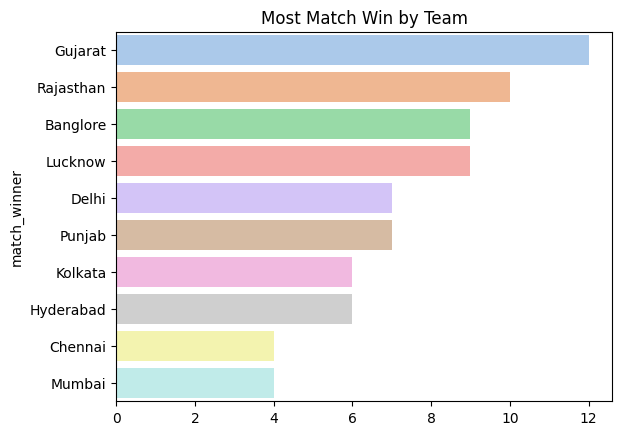

In [43]:
sns.barplot(x=match_win.values, y=match_win.index, palette='pastel')
plt.title("Most Match Win by Team")

### 2. Toss Decision Trends

Text(0.5, 1.0, 'Toss Decision Trends')

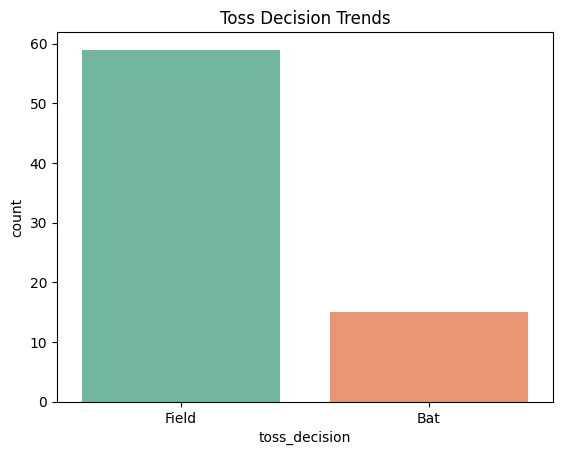

In [51]:
sns.countplot(x=df['toss_decision'], palette='Set2')
plt.title("Toss Decision Trends")

### 3. Toss Winner vs Match Winner

In [59]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()

In [65]:
# get percentage
percentage = (count * 100)/df.shape[0]
percentage.round(2)

48.65

### 4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won by')

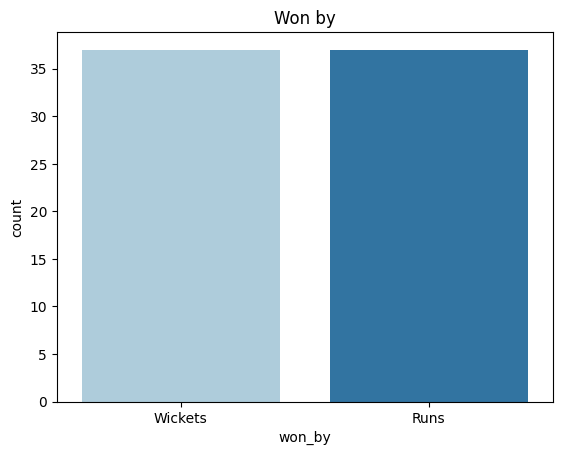

In [71]:
sns.countplot(x=df['won_by'], palette='Paired')
plt.title("Won by")

# Key Player Performances

### 1. Most "Player of the Match" Awards

Text(0.5, 1.0, 'Top 10 Player of the Match')

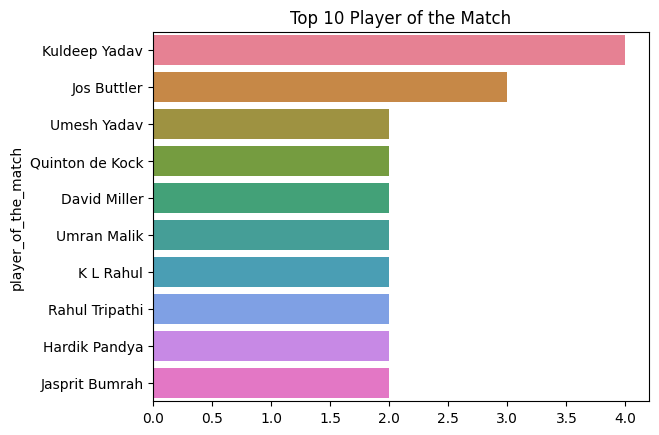

In [96]:
count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x=count.values, y=count.index, palette='husl')
plt.title("Top 10 Player of the Match")

### 2. Top Scorers

In [106]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

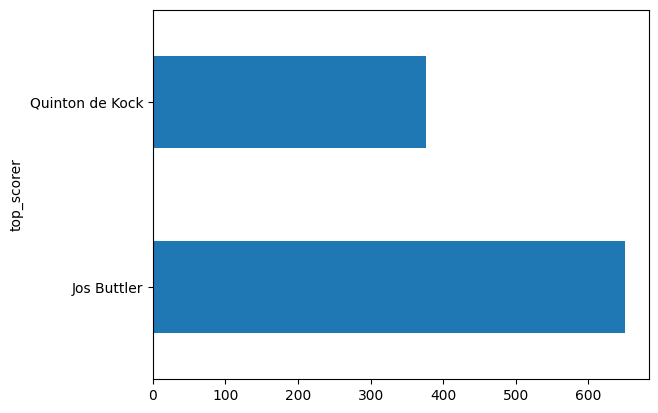

In [114]:
high.plot(kind='barh')

### 4. Top 10 Best Bowling Figures

In [118]:
df.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20


In [120]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split("--")[0])

In [122]:
df.head(2)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3


In [126]:
df['highest_wickets'].dtypes

dtype('O')

In [128]:
df['highest_wickets'] = df['highest_wickets'].astype(int)

In [132]:
df['highest_wickets'].dtypes

dtype('int32')

In [144]:
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)

<Axes: ylabel='best_bowling'>

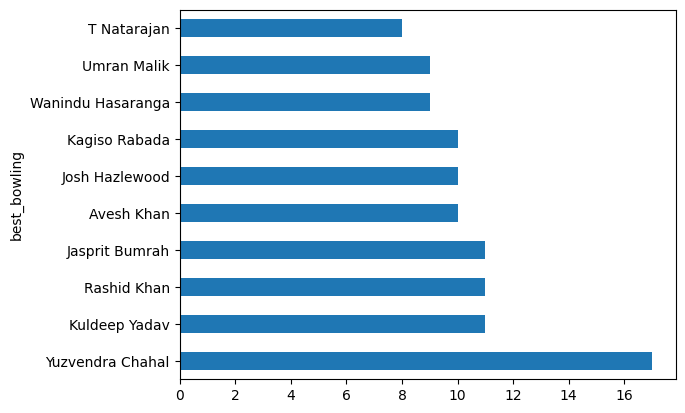

In [148]:
top_bowlers.plot(kind='barh')

# Venue Analysis

### 1. Most Matches Played by Venue

In [155]:
venue_count = df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

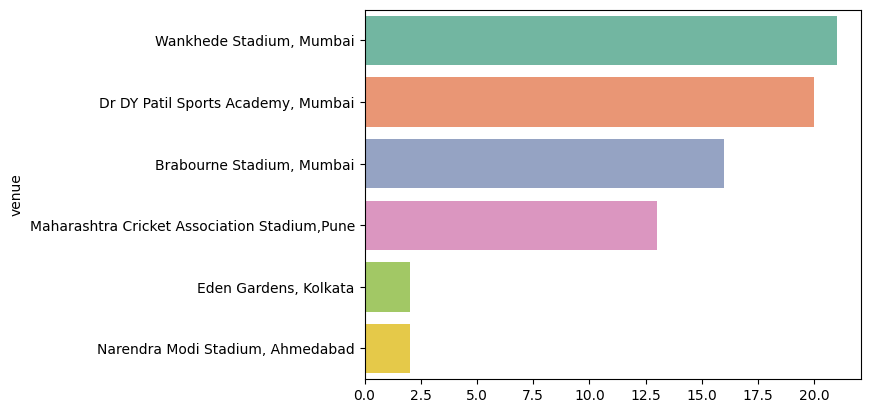

In [159]:
sns.barplot(x=venue_count.values, y=venue_count.index, palette='Set2')

# Custom Questions & Insights

### 1. Who won the highest margin by runs?

In [178]:
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


### 2. Which player had the highest individual score?

In [190]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


### 3. Which bowler had the best bowling figures?

In [194]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
